[*********************100%***********************]  1 of 1 completed


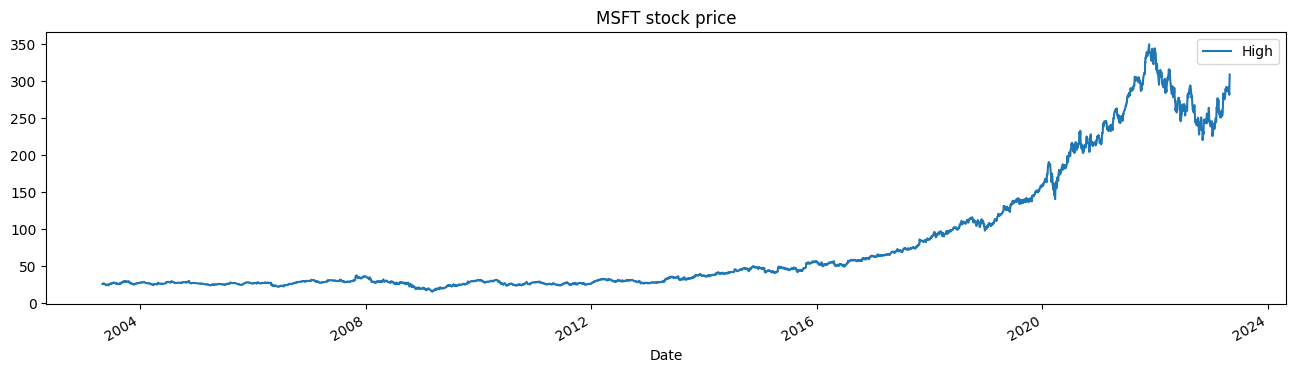

In [11]:
import yfinance as yf

#data是我從yfince抓下來的
data = yf.download("MSFT", start="2003-05-01", end="2023-5-1")
import matplotlib.pylab as plt

data["High"][:].plot(figsize=(16,4),legend=True)
plt.title('MSFT stock price')
plt.show()

[*********************100%***********************]  1 of 1 completed


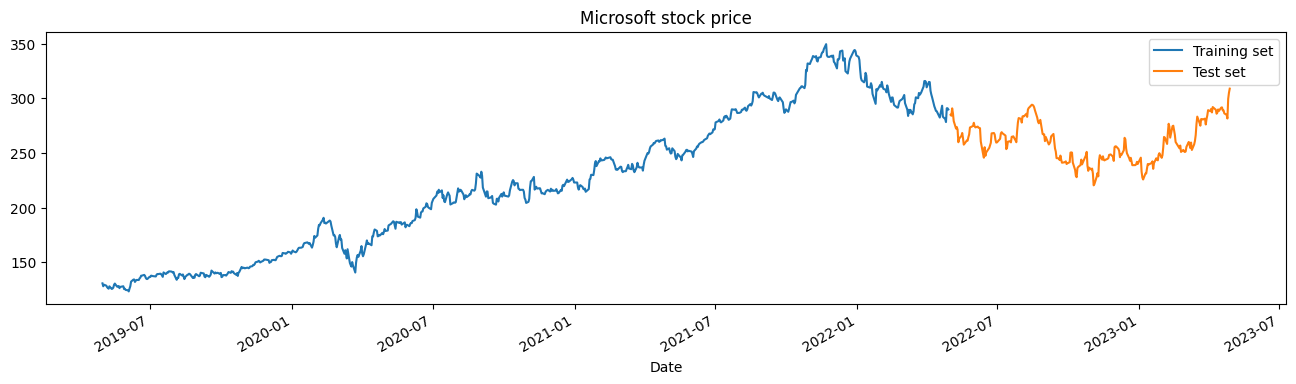

In [12]:
#觀察到前面很平緩，我從2019開始預測
data = yf.download("MSFT", start="2019-05-01", end="2023-5-1")
training_set = data[:'2022-05-01'].iloc[:,1].values
test_set = data['2022-05-02':].iloc[:,1].values

data["High"][:'2022-05-01'].plot(figsize=(16,4),legend=True)
data["High"]['2022-05-02':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set','Test set'])
plt.title('Microsoft stock price')
plt.show()


In [13]:
print('train_set shape', training_set.shape)
print('test_set shape', test_set.shape)

train_set shape (757,)
test_set shape (250,)


In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set = training_set.reshape(-1,1)
training_set_std = sc.fit_transform(training_set)

import numpy as np
X_train = []
y_train = []
for i in range(60,757):
    X_train.append(training_set_std[i-60:i,0])
    y_train.append(training_set_std[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
#用4層LSTM
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train,y_train,epochs=30,batch_size=32)

import pandas as pd
dataset_total = pd.concat((data["High"][:'2022-05-01'],data["High"]['2022-05-02':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

X_test = []
for i in range(60,310):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
y_hat = model.predict(X_test)
y_hat = sc.inverse_transform(y_hat)

from sklearn.metrics import mean_squared_error
print('4層LSTM MSE(Adam):', mean_squared_error(test_set, y_hat))

Epoch 1/30


2023-05-18 23:57:34.486568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-18 23:57:35.477989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-18 23:57:35.493152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-18 23:57:35.749959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-18 23:57:35.764172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-18 23:57:36.029852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-18 23:57:36.044013: I tensorflow/core/grappler/optimizers/cust

22/22 [==============================] - 17s 287ms/step - loss: 0.1497
Epoch 2/30
22/22 [==============================] - 3s 141ms/step - loss: 0.0363
Epoch 3/30
22/22 [==============================] - 3s 131ms/step - loss: 0.0230
Epoch 4/30
22/22 [==============================] - 3s 158ms/step - loss: 0.0169
Epoch 5/30
22/22 [==============================] - 3s 142ms/step - loss: 0.0164
Epoch 6/30
22/22 [==============================] - 3s 146ms/step - loss: 0.0143
Epoch 7/30
22/22 [==============================] - 3s 135ms/step - loss: 0.0146
Epoch 8/30
22/22 [==============================] - 3s 133ms/step - loss: 0.0142
Epoch 9/30
22/22 [==============================] - 3s 138ms/step - loss: 0.0134
Epoch 10/30
22/22 [==============================] - 3s 154ms/step - loss: 0.0117
Epoch 11/30
22/22 [==============================] - 3s 134ms/step - loss: 0.0119
Epoch 12/30
22/22 [==============================] - 3s 128ms/step - loss: 0.0116
Epoch 13/30
22/22 [================

2023-05-19 00:04:06.807744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:04:07.162712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:04:07.175427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:04:07.467382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:04:07.477214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:04:07.755096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:04:07.765139: I tensorflow/core/grappler/optimizers/cust

8/8 [==============================] - 4s 192ms/step
4層LSTM MSE(Adam): 41.063271790466274


In [16]:
from tensorflow.keras.optimizers import SGD, RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.01), loss='mean_squared_error')
model.fit(X_train,y_train,epochs=30,batch_size=32)
y_hat = model.predict(X_test)
y_hat = sc.inverse_transform(y_hat)
print('4層LSTM MSE(RMSprop):', mean_squared_error(test_set, y_hat))

Epoch 1/30


2023-05-19 00:04:14.726634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:04:15.914823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:04:15.928968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:04:16.202182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:04:16.216049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:04:16.523255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:04:16.537403: I tensorflow/core/grappler/optimizers/cust

22/22 [==============================] - 17s 351ms/step - loss: 1.0881
Epoch 2/30
22/22 [==============================] - 4s 156ms/step - loss: 0.2343
Epoch 3/30
22/22 [==============================] - 3s 146ms/step - loss: 0.1691
Epoch 4/30
22/22 [==============================] - 3s 145ms/step - loss: 0.1533
Epoch 5/30
22/22 [==============================] - 3s 143ms/step - loss: 0.1060
Epoch 6/30
22/22 [==============================] - 3s 138ms/step - loss: 0.0797
Epoch 7/30
22/22 [==============================] - 3s 143ms/step - loss: 0.0656
Epoch 8/30
22/22 [==============================] - 3s 137ms/step - loss: 0.0469
Epoch 9/30
22/22 [==============================] - 3s 138ms/step - loss: 0.0361
Epoch 10/30
22/22 [==============================] - 3s 138ms/step - loss: 0.0434
Epoch 11/30
22/22 [==============================] - 4s 161ms/step - loss: 0.0298
Epoch 12/30
22/22 [==============================] - 4s 162ms/step - loss: 0.0331
Epoch 13/30
22/22 [================

2023-05-19 00:06:00.127281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:00.470110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:00.481548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:00.761114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:00.771167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:01.064087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:01.074662: I tensorflow/core/grappler/optimizers/cust

8/8 [==============================] - 4s 235ms/step
4層LSTM MSE(RMSprop): 62.65934543531667


In [17]:
#用4層GRU
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9),loss='mean_squared_error')
model.fit(X_train,y_train,epochs=30,batch_size=150)
print('4層GRU MSE(SGD):', mean_squared_error(test_set, y_hat))

model.compile(optimizer=RMSprop(learning_rate=0.001),loss='mean_squared_error')
model.fit(X_train,y_train,epochs=30,batch_size=150)
y_hat = model.predict(X_test)
y_hat= sc.inverse_transform(y_hat)
print('4層GRU MSE(RMSprop):', mean_squared_error(test_set, y_hat))

Epoch 1/30


2023-05-19 00:06:06.730619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:07.260999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:07.491775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:07.719562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:07.974970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:08.274367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:08.561259: I tensorflow/core/grappler/optimizers/cust

5/5 [==============================] - 8s 528ms/step - loss: 0.7930
Epoch 2/30
5/5 [==============================] - 1s 155ms/step - loss: 0.7157
Epoch 3/30
5/5 [==============================] - 0s 98ms/step - loss: 0.6068
Epoch 4/30
5/5 [==============================] - 0s 79ms/step - loss: 0.4859
Epoch 5/30
5/5 [==============================] - 0s 80ms/step - loss: 0.3626
Epoch 6/30
5/5 [==============================] - 0s 84ms/step - loss: 0.2494
Epoch 7/30
5/5 [==============================] - 0s 87ms/step - loss: 0.1504
Epoch 8/30
5/5 [==============================] - 0s 79ms/step - loss: 0.0760
Epoch 9/30
5/5 [==============================] - 0s 69ms/step - loss: 0.0446
Epoch 10/30
5/5 [==============================] - 0s 70ms/step - loss: 0.0391
Epoch 11/30
5/5 [==============================] - 0s 71ms/step - loss: 0.0437
Epoch 12/30
5/5 [==============================] - 0s 70ms/step - loss: 0.0433
Epoch 13/30
5/5 [==============================] - 0s 82ms/step - loss

2023-05-19 00:06:25.918197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:26.494841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:26.831398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:27.057508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:27.287067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:27.695483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:28.097718: I tensorflow/core/grappler/optimizers/cust

5/5 [==============================] - 9s 718ms/step - loss: 0.0861
Epoch 2/30
5/5 [==============================] - 1s 208ms/step - loss: 0.0338
Epoch 3/30
5/5 [==============================] - 1s 155ms/step - loss: 0.0407
Epoch 4/30
5/5 [==============================] - 1s 147ms/step - loss: 0.0362
Epoch 5/30
5/5 [==============================] - 1s 113ms/step - loss: 0.0422
Epoch 6/30
5/5 [==============================] - 0s 89ms/step - loss: 0.0444
Epoch 7/30
5/5 [==============================] - 0s 93ms/step - loss: 0.0317
Epoch 8/30
5/5 [==============================] - 0s 85ms/step - loss: 0.0386
Epoch 9/30
5/5 [==============================] - 0s 90ms/step - loss: 0.0352
Epoch 10/30
5/5 [==============================] - 0s 100ms/step - loss: 0.0295
Epoch 11/30
5/5 [==============================] - 0s 83ms/step - loss: 0.0429
Epoch 12/30
5/5 [==============================] - 0s 82ms/step - loss: 0.0260
Epoch 13/30
5/5 [==============================] - 0s 77ms/step - 

2023-05-19 00:06:46.696171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:46.848472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:47.090585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:47.372199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-19 00:06:47.593811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 3s 126ms/step
4層GRU MSE(RMSprop): 114.26558586753066
